In [2]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import os
import numpy as np

# Load JSON
filepath = os.path.join("Data", "CIA_WFB.json")
with open(filepath) as jsonfile:
    CIA_WFB = json.load(jsonfile)


In [3]:
country_list = []
size_list = []
climate_list = []
pop_list = []
median_age_list = []
urbanization_list = []
life_exp_list = []
drinking_water_source_list = []
roadways_rank_list = []


countries = ["ethiopia", "germany", "japan", "kenya", "united_states", "united_kingdom"]

for country in countries:
        
    data = CIA_WFB["countries"][country]
    
  
    country_list.append((data['data']['name']))
    size_list.append((data['data']['geography']['area']['comparative']))
    climate_list.append((data['data']['geography']['climate']))
    pop_list.append((data['data']['people']['population']['total']))
    median_age_list.append((data['data']['people']['median_age']['total']['value']))
    urbanization_list.append((data['data']['people']['urbanization']['urban_population']['value']))
    life_exp_list.append((data['data']['people']['life_expectancy_at_birth']['total_population']['value']))
    drinking_water_source_list.append((data['data']['people']['drinking_water_source']['improved']['total']['value']))
    roadways_rank_list.append((data['data']['transportation']['roadways']['global_rank']))


In [4]:
country_info_df = pd.DataFrame({'country':country_list, 
                                'size':size_list, 
                                'climate':climate_list, 
                                'population':pop_list, 
                                'median_age':median_age_list, 
                                'urbanization':urbanization_list,
                                'life_expectancy':life_exp_list,
                                'drinking_water_source':drinking_water_source_list,
                                'roads_global_rank':roadways_rank_list, 
    
})
country_info_df


,country,size,climate,population,median_age,urbanization,life_expectancy,drinking_water_source,roads_global_rank
0,Ethiopia,slightly less than twice the size of Texas,tropical monsoon with wide topographic-induced...,102374044,17.8,19.5,62.2,57.3,44
1,Germany,three times the size of Pennsylvania; slightly...,"temperate and marine; cool, cloudy, wet winter...",80722792,46.8,75.3,80.7,100.0,12
2,Japan,slightly smaller than California,varies from tropical in south to cool temperat...,126702133,46.9,93.5,85.0,100.0,6
3,Kenya,five times the size of Ohio; slightly more tha...,varies from tropical along coast to arid in in...,46790758,19.5,25.6,64.0,63.2,32
4,United States,about half the size of Russia; about three-ten...,"mostly temperate, but tropical in Hawaii and F...",323995528,37.9,81.6,79.8,99.2,1
5,United Kingdom,twice the size of Pennsylvania; slightly small...,temperate; moderated by prevailing southwest w...,64430428,40.5,82.6,80.7,100.0,18


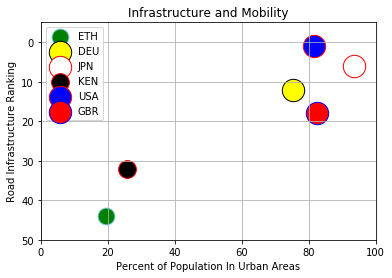

In [7]:
ethiopia_dem_df = country_info_df.loc [country_info_df["country"] == 'Ethiopia']
germany_dem_df = country_info_df.loc [country_info_df["country"] == 'Germany']
japan_dem_df = country_info_df.loc [country_info_df["country"] == 'Japan']
kenya_dem_df = country_info_df.loc [country_info_df["country"] == 'Kenya']
us_dem_df = country_info_df.loc [country_info_df["country"] == 'United States']
uk_dem_df = country_info_df.loc [country_info_df["country"] == 'United Kingdom']

x1 = (ethiopia_dem_df["urbanization"])
y1 = (ethiopia_dem_df["roads_global_rank"])
s1 = (ethiopia_dem_df["drinking_water_source"])

x2 = (germany_dem_df["urbanization"])
y2 = (germany_dem_df["roads_global_rank"])
s2 = (germany_dem_df["drinking_water_source"])

x3 = (japan_dem_df["urbanization"])
y3 = (japan_dem_df["roads_global_rank"])
s3 = (japan_dem_df["drinking_water_source"])

x4 = (kenya_dem_df["urbanization"])
y4 = (kenya_dem_df["roads_global_rank"])
s4 = (kenya_dem_df["drinking_water_source"])

x5 = (us_dem_df["urbanization"])
y5 = (us_dem_df["roads_global_rank"])
s5 = (us_dem_df["drinking_water_source"])

x6 = (uk_dem_df["urbanization"])
y6 = (uk_dem_df["roads_global_rank"])
s6 = (uk_dem_df["drinking_water_source"])

ETH = plt.scatter(x1, y1, s = s1*5, marker="o", facecolors="green", edgecolors="SkyBlue")
DEU = plt.scatter(x2, y2, s = s2*5, marker="o", facecolors="yellow", edgecolors="black")
JPN = plt.scatter(x3, y3, s = s3*5, marker="o", facecolors="white", edgecolors="red")
KEN = plt.scatter(x4, y4, s = s4*5, marker="o", facecolors="black", edgecolors="red")
USA = plt.scatter(x5, y5, s = s5*5, marker="o", facecolors="blue", edgecolors="red")
GBR = plt.scatter(x6, y6, s = s6*5, marker="o", facecolors="red", edgecolors="blue")

plt.ylim(50,-5)
plt.xlim(0,100)
plt.ylabel("Road Infrastructure Ranking")
plt.xlabel("Percent of Population In Urban Areas")
plt.title("Infrastructure and Mobility")

plt.legend(('ETH', 'DEU', 'JPN', 'KEN', 'USA', 'GBR'),
           loc = "best")
plt.grid(True)
plt.savefig('devel.png')
